In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Crimes_2001_to_Present.csv")

In [3]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [4]:
# drop the "faulty" years

df=df[df.Year > 2002]
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8134887,12131776,JD327752,08/10/2020 08:30:00 PM,066XX S SACRAMENTO AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,17.0,66.0,05,1157527.0,1860392.0,2020,08/17/2020 03:41:32 PM,41.772671,-87.698104,"(41.772671069, -87.698104059)"
8134888,12082414,JD269218,06/18/2020 09:00:00 PM,093XX S DR MARTIN LUTHER KING JR DR,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,9.0,49.0,06,1180558.0,1843036.0,2020,06/25/2020 03:41:40 PM,41.724546,-87.614211,"(41.724546436, -87.614210743)"
8134889,12118237,JD311791,07/27/2020 03:02:00 PM,033XX W POLK ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,24.0,27.0,08B,1154169.0,1896171.0,2020,08/03/2020 03:41:51 PM,41.870921,-87.709461,"(41.870920735, -87.709461362)"
8134890,12142591,JD340297,08/14/2020 03:00:00 PM,023XX W ROSEMONT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,50.0,2.0,07,1159419.0,1941765.0,2020,08/26/2020 03:40:41 PM,41.995927,-87.688929,"(41.995927389, -87.688928533)"


In [ ]:
#df.drop(columns=['Case Number', 'Block', 'IUCR', 'Primary Type',
#       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
#       'District', 'Ward', 'FBI Code', 'X Coordinate',
#       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
#       'Location'], inplace=True)

**Crimes per community area (ca)**:


In [5]:
ca_df=df.groupby("Community Area").count()[["ID"]].rename(columns={"ID" : "crime_count" })
ca_df

,crime_count
Community Area,
0.0,70
1.0,110718
2.0,92908
3.0,105113
4.0,51475
...,...
73.0,85608
74.0,15979
75.0,57005


**Daily crimes in ca 25**:

In [6]:
worst =  float(ca_df[ ca_df["crime_count"]==int(ca_df.max()[0]) ].index[0] )
df_25=df[df["Community Area"]==worst].drop(columns="Community Area")

<ipython-input-6-51a5dc798c83>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  worst =  float(ca_df[ ca_df["crime_count"]==int(ca_df.max()[0]) ].index[0] )


In [7]:
# (much quicker) df_25["date"]=pd.to_datetime(df_25.Date)

In [8]:
# convert date to datetime

from datetime import datetime

def timer(t):
    return datetime.strptime(t, "%m/%d/%Y %I:%M:%S %p")

df_25["Date_dt"]=df_25["Date"].apply(timer)

In [9]:
df_25["day"]=df_25['Date_dt'].dt.to_period('D')

In [10]:
ca25daily_df=df_25.groupby("day").count().rename(columns={"ID" : "crime_count" })[["crime_count"]]

In [11]:
ca25daily_df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 7894 entries, 2003-01-01 to 2024-08-11
Freq: D
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   crime_count  7894 non-null   int64
dtypes: int64(1)
memory usage: 123.3 KB


<Axes: xlabel='day'>

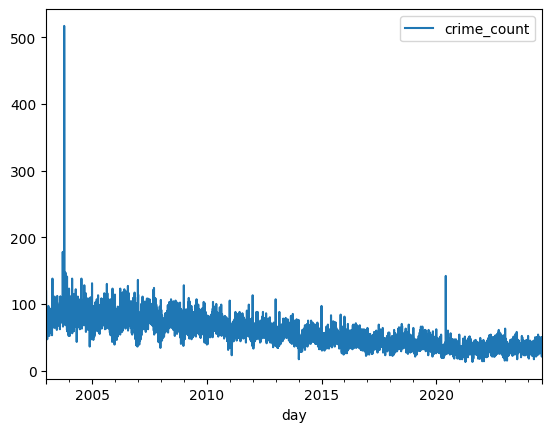

In [12]:
ca25daily_df.plot()

**NN model:**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
# DATA PREPROCESS

# turn crimes into list
crime_count_list = list(ca25daily_df["crime_count"])

# parameters
sequence_length = 365  # number of days to consider for predicting the next day

# create sequences
X, y = [], []
for i in range(sequence_length, len(crime_count_list)):
    X.append(crime_count_list[i-sequence_length:i])
    y.append(crime_count_list[i])

X = np.array(X)
y = np.array(y)

# train_test_split
train_size = int(len(X) * 0.9)  # 90% for training
X_train_full, X_test, y_train_full, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, shuffle=False)

In [15]:
scaler=MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_val_scaled=scaler.transform(X_val)

NameError: name 'X_val' is not defined

In [18]:
# NN Architecture

model = Sequential()

model.add(layers.GRU(units=32, activation='relu', input_shape=(365, 1), return_sequences=True))
model.add(layers.GRU(units=32, activation='relu', return_sequences=True))
model.add(layers.GRU(units=16, activation='relu', return_sequences=True))
model.add(layers.GRU(units=8, activation='relu'))

model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="linear"))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 365, 32)             │           3,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 365, 32)             │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 365, 16)             │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 8)                   │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,881 (50.32 KB)

 Trainable params: 12,881 (50.32 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compilation

model.compile(loss='mae',
              optimizer=Adam(learning_rate=0.0005))

# Fit
es = EarlyStopping(patience=20, restore_best_weights=True)

history=model.fit(X_train_scaled, y_train, epochs=10, verbose=1, batch_size= 16 ,validation_data=(X_val_scaled,y_val)
                  , callbacks=[es]
                 )

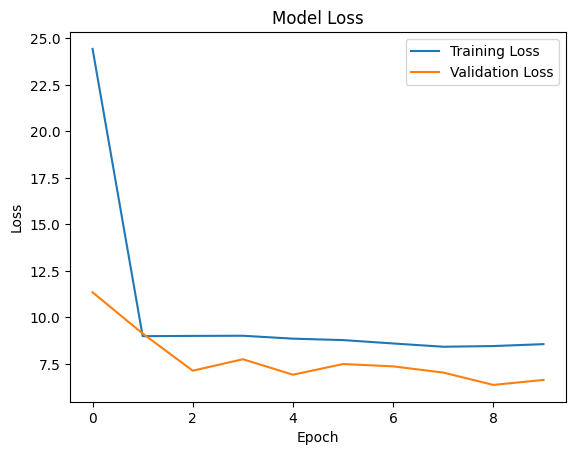

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [21]:
y_pred=model.predict(X_test_scaled)
mean_absolute_error(y_test, y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step


6.186673310015148

In [27]:
y_hat=np.array( [X_test[i][-1] for i in range(len(X_test)) ] )

mean_absolute_error(y_test, y_hat)

7.288180610889774

In [34]:
X_test.shape, y_test.shape

((753, 365), (753,))

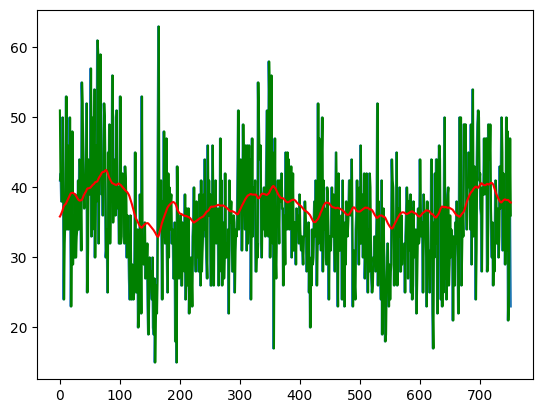

In [30]:
plt.plot(pd.DataFrame(y_test))
plt.plot(pd.DataFrame(y_hat), color= "green")
plt.plot(pd.DataFrame(y_pred), color= "red")